<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Технический-блок" data-toc-modified-id="Технический-блок-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Технический блок</a></span></li><li><span><a href="#Рассмотрение-одного-региона" data-toc-modified-id="Рассмотрение-одного-региона-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Рассмотрение одного региона</a></span><ul class="toc-item"><li><span><a href="#Импорт-и-ознакомление-с-данными" data-toc-modified-id="Импорт-и-ознакомление-с-данными-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Импорт и ознакомление с данными</a></span></li><li><span><a href="#Разбиение-на-выборки" data-toc-modified-id="Разбиение-на-выборки-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Разбиение на выборки</a></span></li><li><span><a href="#Готовим-пайплайн" data-toc-modified-id="Готовим-пайплайн-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Готовим пайплайн</a></span></li><li><span><a href="#Обучение-и-проверка-модели" data-toc-modified-id="Обучение-и-проверка-модели-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Обучение и проверка модели</a></span></li><li><span><a href="#А-нельзя-ли-лучше?" data-toc-modified-id="А-нельзя-ли-лучше?-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>А нельзя ли лучше?</a></span></li><li><span><a href="#Готовим-датафрейм-для-анализа" data-toc-modified-id="Готовим-датафрейм-для-анализа-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Готовим датафрейм для анализа</a></span></li><li><span><a href="#Подготовка-к-расчёту-прибыли" data-toc-modified-id="Подготовка-к-расчёту-прибыли-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>Подготовка к расчёту прибыли</a></span></li><li><span><a href="#Расчёт-прибыли-и-рисков" data-toc-modified-id="Расчёт-прибыли-и-рисков-2.8"><span class="toc-item-num">2.8&nbsp;&nbsp;</span>Расчёт прибыли и рисков</a></span></li></ul></li><li><span><a href="#Единая-функция-для-анализа" data-toc-modified-id="Единая-функция-для-анализа-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Единая функция для анализа</a></span><ul class="toc-item"><li><span><a href="#Регион-0" data-toc-modified-id="Регион-0-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Регион 0</a></span></li><li><span><a href="#Регион-1" data-toc-modified-id="Регион-1-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Регион 1</a></span></li><li><span><a href="#Регион-2" data-toc-modified-id="Регион-2-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Регион 2</a></span></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Выводы</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Выбор локации для скважины

Цель работы - выбрать из трех регионов наиболее экономически перспективный для добычи нефти.

Исходные данные - сведения о множестве скважин в регионах, содержащие фичи и целевой признак (количество продукта в скважине).

Заранее определенная стратегия развития региона, на которую следует ориентироваться:
- случайным образом выбираются 500 новых скважин, не входящих в исходные данные. Почему нельзя использовать исходные данные - не понятно. Но мы считаем, что эти 500 скважин придут к нам из той же генеральной совокупности, что и имеющиеся данные
- из этих 500 на основе обученной нами модели будут выбраны 200, имеющих максимальное количество продукта. Количество продукта будет оценено исключительно модельно на основе фичей, которые мы сможем измерить на этих 500 скважинах
- на разработку этих 200 скважин будет потрачено 10 млрд.руб.
- доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей
- необходимо выбрать регион, который отвечает двум требованиям: риск убытков составляет не более 2.5% и он имеет максимальную среднюю прибыль среди всех таких регионов с малым риском

В работе нам придется повторить большое количество действий (основных и диагностических) для трех файлов. Поэтому сначала мы на примере одного файла выполним эти действия пошагово, а потом объединим их в функцию, которую запустим несколько раз.

## Технический блок

In [1]:
import warnings
warnings.filterwarnings('ignore')
import sys
#!{sys.executable} -m pip install --upgrade pip --quiet
print('Устанавливаем модули...')
!{sys.executable} -m pip install -U phik --quiet --default-timeout=100 -i https://pypi.tuna.tsinghua.edu.cn/simple
!{sys.executable} -m pip install -U imbalanced-learn --quiet --default-timeout=100 -i https://pypi.tuna.tsinghua.edu.cn/simple
print('Модули установлены')
import six
sys.modules['sklearn.externals.six'] = six
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
from sklearn import model_selection, linear_model, metrics, ensemble, preprocessing
import phik
from imblearn.pipeline import Pipeline
from imblearn import FunctionSampler

Устанавливаем модули...
Модули установлены


In [2]:
%matplotlib inline
sns.set()
sns.set(rc={'figure.figsize': (6, 6)})
sns.set_style("whitegrid")
sns.set_palette('pastel')
plt.rcParams["figure.figsize"] = (6, 6)

random_state = 2077
np.random.seed(seed=random_state)
state = np.random.RandomState(random_state)

features = 'features'
targets = 'targets'

## Рассмотрение одного региона

### Импорт и ознакомление с данными

In [3]:
name = 'geo_data_0.csv'
file_path = 'H:/Google_d/2021_ШАД/Yandex - project 8/'
file_name_full = file_path + name
try:
    df = pd.read_csv('/datasets/' + name, sep=',', index_col=0)  # Серверный путь
    print('Загружено с сервера')
except:
    try:
        df = pd.read_csv(file_name_full, sep=',', index_col=0)  # Локальный путь
        print('Загружено с локального диска')
    except:
        print('file not loaded');
f0 = 'f0'
f1 = 'f1'
f2 = 'f2'
f_list = [f0, f1, f2]
prod = 'product'
pred = 'predict'
df.columns = df.columns.str.lower()
display(df.info())
df.head()

Загружено с сервера
<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, txEyH to 1CWhH
Data columns (total 4 columns):
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4)
memory usage: 3.8+ MB


None

,f0,f1,f2,product
id,,,,
txEyH,0.705745,-0.497823,1.221170,105.280062
2acmU,1.334711,-0.340164,4.365080,73.037750
409Wp,1.022732,0.151990,1.419926,85.265647
iJLyR,-0.032172,0.139033,2.978566,168.620776
Xdl7t,1.988431,0.155413,4.751769,154.036647


В файле 100к строк. Индекс строки - непонятное сочетание символов, как-то идентифицирующее скважину. Фичи f0,f1,f2 - дробные числа. Таргет (продукт) - дробное число.

In [4]:
df = df.reset_index(drop=True)
print('Дубликатов:', df.duplicated().sum())
print('Пропусков:', df.isna().sum().sum())

Дубликатов: 0
Пропусков: 0


Посмотрим на точки глазами.

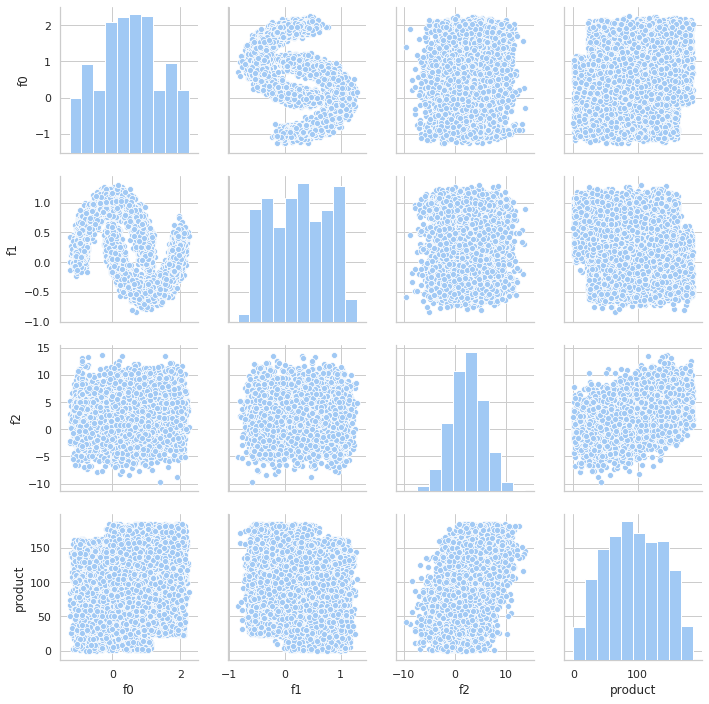

In [5]:
sns.pairplot(df.sample(frac=0.1));

- фичи явно синтетические, причем вот эти "полукольца" генерятся каким-то стандартным генератором
- кажется, что у фичей почти нет значимых выбросов
- таргет тоже не имеет выбросов, но распределение имеет странную структуру
- фичи 1 и 2 имеют сомнительную предсказательную способность (по крайней мере, в линейном приближении)
- фича 3 имеет явно выраженную корреляцию с таргетом, но не объясняет всю дисперсию
- важно! Таргет обрублен по краям. Это видно как по гистограмме, так и по соседним графикам. Отдельно отметим, что таргет жестко ограничен сверху

Посмотрим на коэффициенты корреляции.

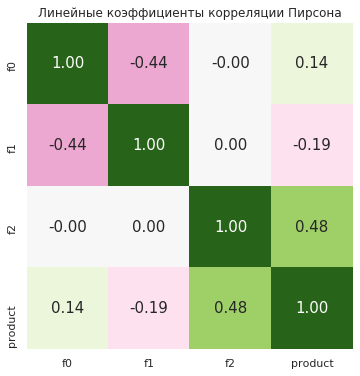

In [6]:
ax = sns.heatmap(data=df.corr(),
                 square=True, cmap="PiYG",
                 center=0,
                 cbar=False,
                 annot=True, fmt='.2f', annot_kws={'size': 15})
ax.set(title='Линейные коэффициенты корреляции Пирсона');

В линейном приближении таргет слабо скоррелирован со всеми фичами. Посмотрим, что там в нелинейном.

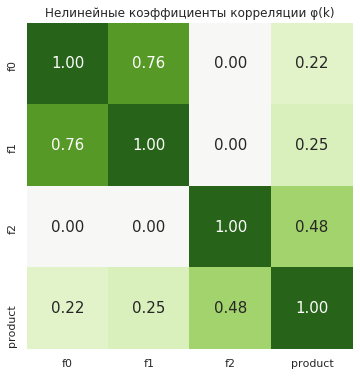

In [7]:
ax = sns.heatmap(data=df.phik_matrix(interval_cols=df.columns),
                 square=True, cmap="PiYG",
                 center=0,
                 cbar=False,
                 annot=True, fmt='.2f', annot_kws={'size': 15})
ax.set(title='Нелинейные коэффициенты корреляции \u03C6(k)');

На этом датасете нелинейная корреляция ничего нового нам не открыла.

Надо бы еще проверить поточнее нормальность и выбросы. Начнем с боксплота.

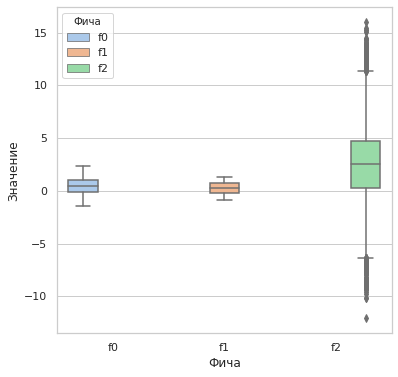

In [8]:
tmp = df.drop(columns=['product']).melt(id_vars=[], var_name='Фича', value_name='Значение')
sns.boxplot(data=tmp, x='Фича', y='Значение', hue='Фича');

Видим "выбросы", но почти наверняка это честные хвосты нормального распределения, т.к. данных очень много, и даже вдалеке от среднего будут какие-то точки. Тут нам поможет куку плот.

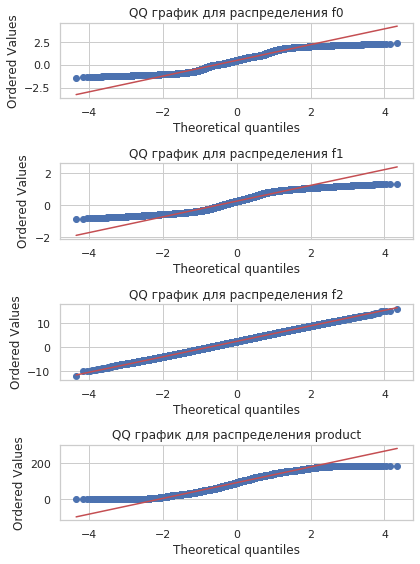

In [27]:
def qq_plots(fig):
    for i, f in enumerate(f_list + ['product']):
        ax = plt.subplot(4, 1, i + 1)
        stats.probplot(df[f], dist="norm", plot=plt)
        ax.set_title('QQ график для распределения ' + f)
    fig.tight_layout()
    plt.show()

fig = plt.figure(figsize=(6, 8))
qq_plots(fig);

Все распределения фичей тут точно не нормальные

На хвостах есть точки, которые я бы все-таки назвал выбросами. Возможно, перед обучением стоит удалить из обучающей выборки несколько наиболее экстремальных значений.

Распределение таргета тоже не нормальное. Пока непонятно, на что это повлияет.

### Разбиение на выборки

Разделим данные на обучающую и валидационную (точнее, тестовую) выборки. Чтобы не думать о том, упорядочены ли исходные данные, добавим шаффл.

In [10]:
train = dict()
test = dict()
targets_df = df['product']
features_df = df[f_list]

train[features], test[features], train[targets], test[targets] = model_selection.train_test_split(
    features_df,
    targets_df,
    test_size=0.25,
    random_state=random_state,
    shuffle=True,
)
for i in [train[features], test[features], train[targets], test[targets]]:
    display(i.shape)

(75000, 3)

(25000, 3)

(75000,)

(25000,)

### Готовим пайплайн

Модель будем строить через пайплайн. Но для начала нам потребуется функция для удаления выбросов, которую мы встроим в пайплайн. За образец берем https://www.kaggle.com/jonaspalucibarbosa/removing-outliers-within-a-pipeline/notebook

In [11]:
def CustomSampler_Outliers(X, y):
    percent = 10 / 100000 * 100  # удаляем примерно по 10 точек с каждой стороны

    features = X.columns
    df = X.copy()
    df['Outcome'] = y
    indices = [x for x in df.index]
    out_indexlist = []

    for col in features:
        lower = np.nanpercentile(df[col], percent)
        upper = np.nanpercentile(df[col], 100 - percent)
        outliers_index = df[col][(df[col] < lower) | (df[col] > upper)].index.tolist()
        out_indexlist.extend(outliers_index)

    out_indexlist = list(set(out_indexlist))
    clean_data = np.setdiff1d(indices, out_indexlist)
    return X.loc[clean_data], y.loc[clean_data]

Проверим, что эта функция оставляет от нашего обучающего сета.

In [12]:
a, b = CustomSampler_Outliers(train[features], train[targets])
print(a.shape, b.shape)

(74952, 3) (74952,)


Видим, что теряется адекватное число значений.

Теперь сделаем бэйзлайн модель и проверим ее скор на обычной 4-фолдовой кросс-валидации. Для скоринга будем использовать neg_root_mean_squared_error со знаком минус.

Заодно проверим, что наша функция по удалению выбросов не затронула тестовый датасет!

In [13]:
pipe = Pipeline([
    ('Outlier_removal', FunctionSampler(func=CustomSampler_Outliers, validate=False)),
    ('Scaler', preprocessing.StandardScaler()),
    ('LR', linear_model.LinearRegression())])

### Обучение и проверка модели

In [14]:
a = model_selection.cross_validate(pipe, train[features], train[targets], scoring='neg_root_mean_squared_error', cv=4)
print('RMSE на CV:', -a['test_score'].mean().round(2))

pipe.fit(train[features], train[targets])
print('RMSE на обучающем сете', metrics.mean_squared_error(
    train[targets], pipe.predict(train[features]),
    squared=False).round(2))
print('RMSE на тестовом сете', metrics.mean_squared_error(
    test[targets], pipe.predict(test[features]),
    squared=False).round(2))

print('Количество строк в тестовом датасете:', len(test[features]))
pred_vals = pipe.predict(test[features])
print('Количество предсказаний на тестовом датасете:', len(pred))

RMSE на CV: 37.71
RMSE на обучающем сете 37.71
RMSE на тестовом сете 37.64
Количество строк в тестовом датасете: 25000
Количество предсказаний на тестовом датасете: 7


Итак, видим, что функция отработала нормально и не съела ничего из тестового сета.

Корень из среднеквадратичной ошибки составляет около 38.

Надо бы еще посмотреть на остатки.

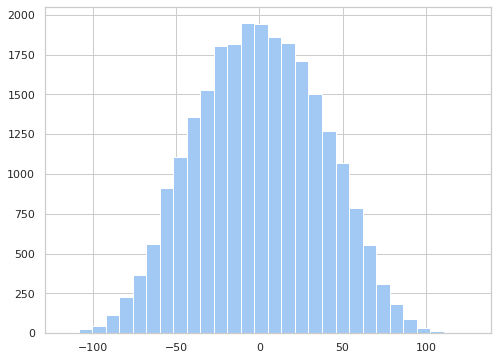

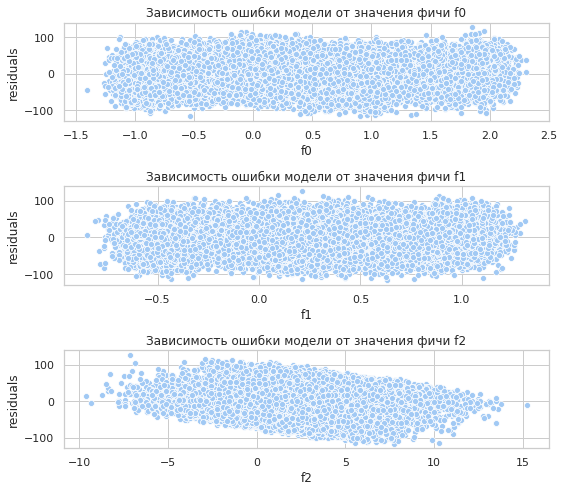

In [15]:
def plot_residuals():
    a = pd.Series(test[targets] - pred_vals, name='residuals')
    a.hist(bins=30)
    plt.show()

    fig = plt.figure(figsize=(8, 7))
    for i, f in enumerate(f_list):
        ax = plt.subplot(3, 1, i + 1)
        sns.scatterplot(x=test[features][f], y=a, ax=ax)
        ax.set_title('Зависимость ошибки модели от значения фичи ' + f)
    fig.tight_layout()
    plt.show()

plt.figure(figsize=(8, 6))
plot_residuals();

С одной стороны, остатки имеют явно нормальное распределение, что хорошо характеризует нашу модель.

С другой стороны, зависимости отстатков от фичей выглядят очень неестественно:
- для фичей 0 и 1 в центре есть "выступ" вниз. Он же был виден выше на pairplot
- для фичи 2 зависимость явно "обрублена" сверху и снизу. Это же было видно на pairplot как жесткое ограничение таргета как снизу, так и сверху

В реальной ситуации, увидев такие данные, я бы, наверное, обратился к заказчику за разъяснениями.

### А нельзя ли лучше?

Вкусим запретный плод и попробуем случайный лес. Параметры подбирать не будем - все равно в работу он не пойдет.

In [16]:
pipe_RF = Pipeline([
    ('Outlier_removal', FunctionSampler(func=CustomSampler_Outliers, validate=False)),
    ('RF', ensemble.RandomForestRegressor(n_estimators=90,
                                          min_samples_split=8,
                                          min_samples_leaf=4,
                                          max_depth=10))])

pipe_RF.fit(train[features], train[targets])
print('RMSE на тестовом сете', metrics.mean_squared_error(
    test[targets], pipe_RF.predict(test[features]),
    squared=False).round(2))

RMSE на тестовом сете 37.22


Интересно, что улучшение незначительное.

После этого я еще поигрался с скейлерами, PCA и PowerTransformer-ом на таргет, но на линейной регрессии не смог получить ничего лучше бэйзлайна. В принципе это логично - линейная регрессия в принципе минимизирует именно нашу целевую метрику, так что почти любые "улучшения" именно по этой целевой метрике и ударят.

### Готовим датафрейм для анализа

Дальше нам сама по себе модель не нужна, но нужны ее предсказания. Поэтому сделаем новый датафрейм, с которым и будем работать дальше.

Есть нюанс: мы обучали на 75% данных, и вообще-то дальше их использовать некорректно, поэтому для работы оставим только отложенную выборку.

Исходные фичи нам уже не нужны, поэтому не будем их учитывать.

In [17]:
boot_df = pd.DataFrame(test[targets], columns=[prod])
boot_df[pred] = pipe.predict(test[features])
boot_df.head()

,product,predict
99972,122.860656,84.619797
907,30.038861,96.190581
8618,60.492946,119.719480
9399,121.898440,88.864842
55124,49.090620,66.183060


### Подготовка к расчёту прибыли

По условию бюджет на разработку 10е9.
Каждая единица продукта (из исходных таблиц) приносит 450е3 дохода.

Посчитаем, сколько сырья необходимо для безубыточной разработки региона.

In [18]:
TOTAL_PROJECT_COST = 10e9
PROFIT_PER_PRODUCT = 450e3

MINIMAL_PRODUCT = TOTAL_PROJECT_COST / PROFIT_PER_PRODUCT
print('Для безубыточной разработки региона необходимо единиц сырья:', round(MINIMAL_PRODUCT))
print('Значит, в среднем каждая из 200 разрабатываемых скважин должна содержать количество сырья:',
      round(MINIMAL_PRODUCT / 200))
print('Средний запас сырья в скважине в регионе:', round(boot_df[prod].mean()))

Для безубыточной разработки региона необходимо единиц сырья: 22222
Значит, в среднем каждая из 200 разрабатываемых скважин должна содержать количество сырья: 111
Средний запас сырья в скважине в регионе: 93


### Расчёт прибыли и рисков

Теперь будем следовать логике:
- наша отложенная выборка из 25% записей - это репрезентативная выборка из генеральной совокупности всех скважин в регионе
- всей генеральной совокупности мы не знаем
- мы можем использовать репрезентативную выборку как модель генеральной совокупности
- используя такую "модельную генеральную совокупность" будем многократно создавать из нее выборки по 500 штук и оценивать требуемые параметры. Таким образом наш бутстрап алгоритм позволит дать вероятностную оценку экономических показателей при выборе скважин в будущем
- каждый раз из 500 скважин будем выбирать 200, на которых наша модель предсказывает максимальное количество продукта
- при расчете дохода от этих скважин будем использовать не модельные данные, а реальные. Таким образом наш бутстрап алгоритм позволит учесть неточность нашей модели

In [19]:
def bootstrap_economy(data, sample_size=500, num_of_active=200, state=state):
    dat = data.sample(n=sample_size, replace=True, random_state=state).reset_index(drop=True)
    dat = dat.sort_values(by=pred, ascending=False).head(num_of_active)
    real_product_sum = dat[prod].sum()
    real_profit = real_product_sum * PROFIT_PER_PRODUCT - TOTAL_PROJECT_COST

    model_product_sum = dat[pred].sum()
    model_profit = model_product_sum * PROFIT_PER_PRODUCT - TOTAL_PROJECT_COST

    return {
        'real_profit': real_profit / 1e6,
        'model_profit': model_profit / 1e6
    }

bootstrap_economy(boot_df)

{'real_profit': 476.06034476224517, 'model_profit': 283.9593798265934}

Для интереса я тут сделал не только "реальную" прибыль, но и модельную. Видим, что реальная ниже. Наша модель далее именно с ней и будет работать.

А теперь запустим это в цикле и посмотрим на результат.

Посмотрим еще на гистограмму, чтобы понять, что же происходит.

Среднее значение прибыли (млрд.руб.): 398.94793068134027
2.5%-процентиль прибыли в распределении (млрд.руб.): -92.56850242284926
97.5%-процентиль прибыли в распределении (млрд.руб.): 878.0560716989628
Вероятность убытков: 6.20%


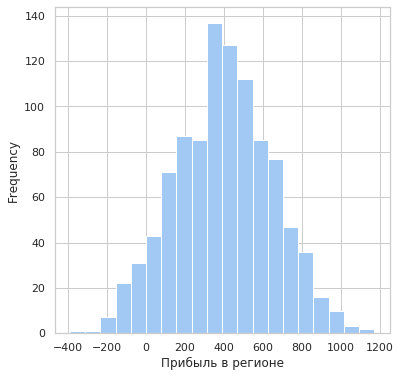

In [20]:
real_profits = []
model_profits = []
state = np.random.RandomState(random_state)
for i in range(0, 1000):
    a = bootstrap_economy(data=boot_df, state=state)
    real_profits.append(a['real_profit'])
    model_profits.append(a['model_profit'])

res = pd.DataFrame({'real_profits': real_profits, 'model_profits': model_profits})
print('Среднее значение прибыли (млрд.руб.):', res['real_profits'].mean())
print('2.5%-процентиль прибыли в распределении (млрд.руб.):', res['real_profits'].quantile(0.025))
print('97.5%-процентиль прибыли в распределении (млрд.руб.):', res['real_profits'].quantile(0.975))
prob_loss = (res['real_profits'] < 0).mean()
print(f'Вероятность убытков: {prob_loss:.2%}')
a = res['real_profits'].plot(kind='hist', bins=20)
a.set_xlabel('Прибыль в регионе');

Видим, что у гистограммы есть "хвост" в области ниже нуля. Отношение площади этого хвоста к общей площади под гистограммой - это и есть риск убытков.

Кроме того, видим, что гистограмма похожа на нормальное распределение, но не совсем. По хорошему, надо было бы сделать больше итераций.

## Единая функция для анализа

Мы прошли вручную весь путь анализа для одного региона, в частности, посмотрели на диагностические графики, и в итоге посчитали среднюю прибыль и риск убытков. Чтобы не проходить весь этот путь заново для всех регионов, напишем функцию, которая будет выполнять все необходимые действия подряд и возвращать только требуемые нам значения.

In [28]:
def calculate_region_profit(file_name):
    print('Загрузка файла', file_name)
    global file_path
    file_name_full = file_path + file_name
    try:
        df = pd.read_csv('/datasets/' + file_name, sep=',', index_col=0)  # Серверный путь
        print('Загружено с сервера')
    except:
        try:
            df = pd.read_csv(file_name_full, sep=',', index_col=0)  # Локальный путь
            print('Загружено с локального диска')
        except:
            print('file not loaded')

    df = df.reset_index(drop=True)
    print('Дубликатов:', df.duplicated().sum())
    print('Пропусков:', df.isna().sum().sum())

    print('Визуализация связей фичей в файле', file_name)
    sns.pairplot(df.sample(frac=0.05))
    plt.show()

    print('Хитмэп корреляций Пирсона в файле', file_name)
    fig = plt.figure(figsize=(6, 6))
    ax = sns.heatmap(data=df.corr(),
                     square=True, cmap="PiYG",
                     center=0,
                     cbar=False,
                     annot=True, fmt='.2f', annot_kws={'size': 15})
    ax.set(title='Линейные коэффициенты корреляции Пирсона')
    plt.show()

    print('Хитмэп корреляций fi(k) в файле', file_name)
    fig = plt.figure(figsize=(6, 6))
    ax = sns.heatmap(data=df.phik_matrix(interval_cols=df.columns),
                     square=True, cmap="PiYG",
                     center=0,
                     cbar=False,
                     annot=True, fmt='.2f', annot_kws={'size': 15})
    ax.set(title='Нелинейные коэффициенты корреляции \u03C6(k)')
    plt.show()

    print('Визуализация выбросов в распределении фичей в файле', file_name)
    fig = plt.figure(figsize=(6, 6))
    tmp = df.drop(columns=['product']).melt(id_vars=[], var_name='Фича', value_name='Значение')
    sns.boxplot(data=tmp, x='Фича', y='Значение', hue='Фича')
    plt.show()

    print('QQ-графики для оценки нормальности фичей в файле', file_name)
    fig = plt.figure(figsize=(6, 8))
    qq_plots(fig)
    plt.show()

    train = dict()
    test = dict()
    targets_df = df['product']
    features_df = df[f_list]

    train[features], test[features], train[targets], test[targets] = model_selection.train_test_split(
        features_df,
        targets_df,
        test_size=0.25,
        random_state=random_state,
        shuffle=True,
    )

    pipe = Pipeline([
        ('Outlier_removal', FunctionSampler(func=CustomSampler_Outliers, validate=False)),
        ('Scaler', preprocessing.StandardScaler()),
        ('LR', linear_model.LinearRegression())])

    print('Обучение модели по файлу', file_name)
    pipe.fit(train[features], train[targets])
    print('RMSE на обучающем сете', metrics.mean_squared_error(
        train[targets], pipe.predict(train[features]),
        squared=False).round(2))
    print('RMSE на тестовом сете', metrics.mean_squared_error(
        test[targets], pipe.predict(test[features]),
        squared=False).round(2))

    print('Ошибки обученной модели по файлу', file_name)
    plt.figure(figsize=(6, 5))
    plot_residuals()

    boot_df = pd.DataFrame(test[targets], columns=[prod])
    boot_df[pred] = pipe.predict(test[features])

    real_profits = []
    model_profits = []
    print('Запускаем бутстрап по файлу', file_name)

    state = np.random.RandomState(random_state)
    for i in range(0, 1000):
        a = bootstrap_economy(data=boot_df, state=state)
        real_profits.append(a['real_profit'])
        model_profits.append(a['model_profit'])

    res = pd.DataFrame({'real_profits': real_profits, 'model_profits': model_profits})

    plt.figure(figsize=(6, 5))
    a = res['real_profits'].plot(kind='hist', bins=20)
    a.set_xlabel('Прибыль в регионе')
    plt.show()

    print('Экономические показатели в регионе', file_name)
    mean_profit = res['real_profits'].mean()
    print('Среднее значение прибыли (млн.руб.):', round(mean_profit, 3))
    lower = res['real_profits'].quantile(0.025)
    upper = res['real_profits'].quantile(0.975)
    print('2.5%-процентиль прибыли в распределении (млн.руб.):', round(lower, 3))
    print('97.5%-процентиль прибыли в распределении (млн.руб.):', round(upper, 3))
    prob_loss = (res['real_profits'] < 0).mean()
    print(f'Вероятность убытков: {prob_loss:.2%}')

    return ({
        "Регион": file_name,
        "Средняя прибыль": round(mean_profit, 0),
        "Доверительный интервал": [round(lower, 0), round(upper, 0)],
        "Вероятность убытка": prob_loss
    })

А теперь будем запускать и смотреть по каждому файлу. Начнем с нулевого, для которого мы все уже сделали вручную, и сравним результат.

И для начала создадим датафрейм для сохранения результатов.

In [29]:
result = pd.DataFrame(columns=['Регион', 'Средняя прибыль', 'Доверительный интервал', 'Вероятность убытка'])

### Регион 0

Загрузка файла geo_data_0.csv
Загружено с сервера
Дубликатов: 0
Пропусков: 0
Визуализация связей фичей в файле geo_data_0.csv


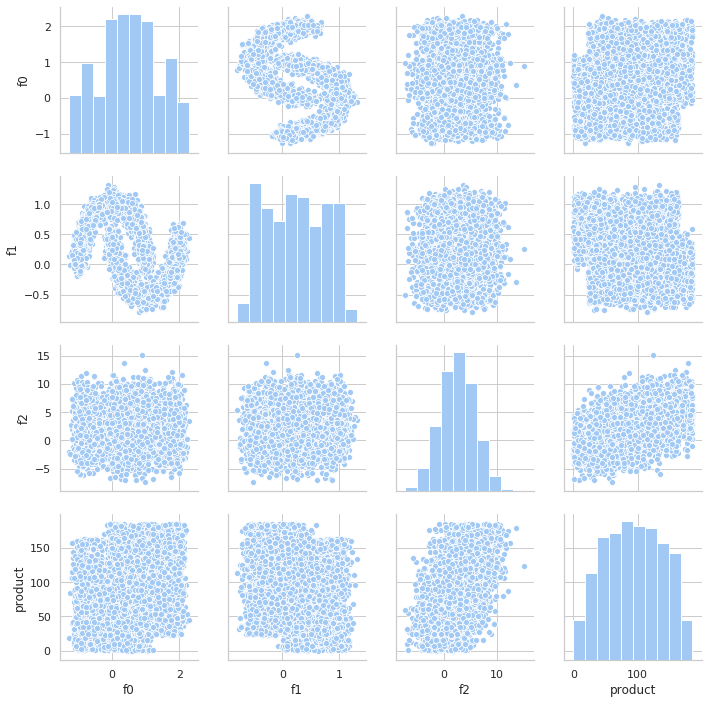

Хитмэп корреляций Пирсона в файле geo_data_0.csv


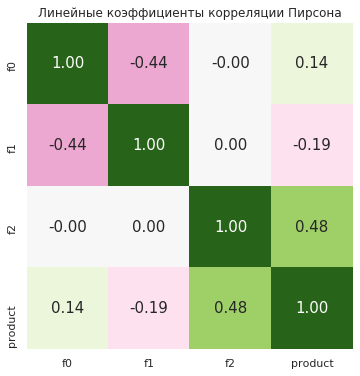

Хитмэп корреляций fi(k) в файле geo_data_0.csv


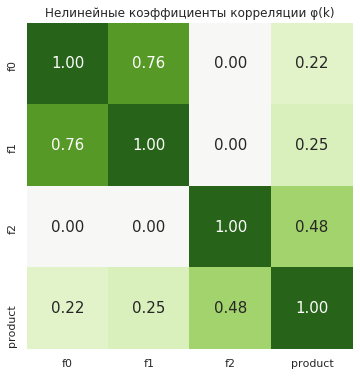

Визуализация выбросов в распределении фичей в файле geo_data_0.csv


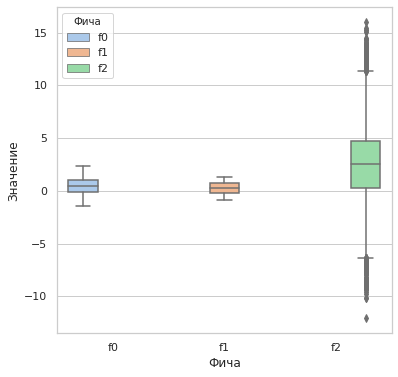

QQ-графики для оценки нормальности фичей в файле geo_data_0.csv


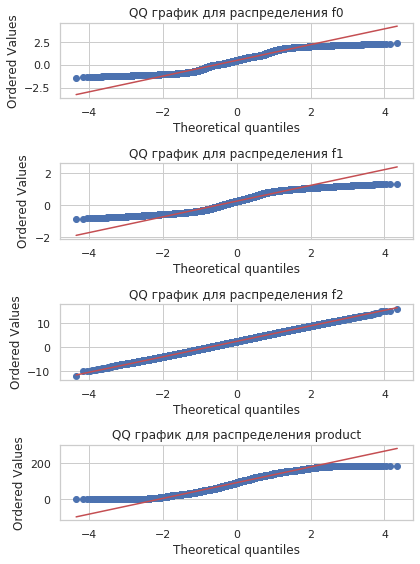

Обучение модели по файлу geo_data_0.csv
RMSE на обучающем сете 37.71
RMSE на тестовом сете 37.64
Ошибки обученной модели по файлу geo_data_0.csv


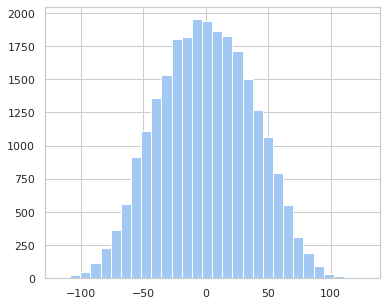

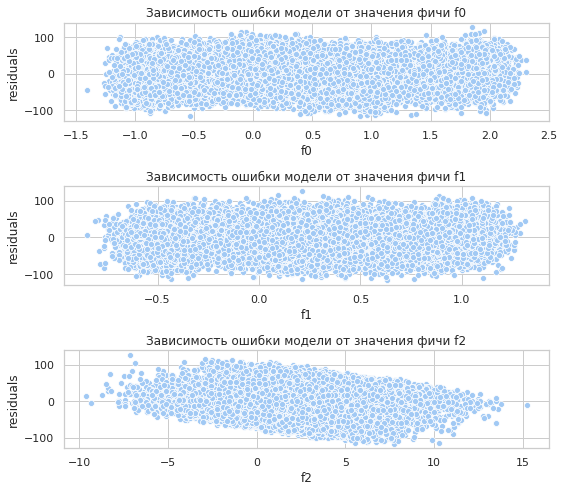

Запускаем бутстрап по файлу geo_data_0.csv


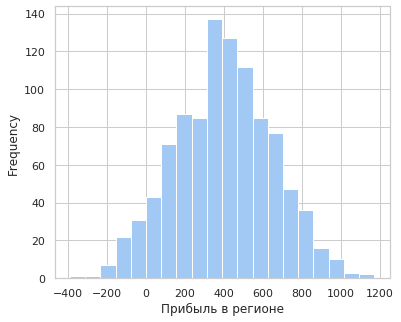

Экономические показатели в регионе geo_data_0.csv
Среднее значение прибыли (млн.руб.): 398.948
2.5%-процентиль прибыли в распределении (млн.руб.): -92.569
97.5%-процентиль прибыли в распределении (млн.руб.): 878.056
Вероятность убытков: 6.20%


In [30]:
d = calculate_region_profit('geo_data_0.csv')
result = result.append(d, ignore_index=True)

Видим, что код сработал нормально, в частности, бутстрап выдал точно такой же результат, что и раньше, за счет использования того же рандом_стейта. По смыслу результата анализировать не будем - мы это все уже рассмотрели.

Погнали в следующий регион.

### Регион 1

Загрузка файла geo_data_1.csv
Загружено с сервера
Дубликатов: 0
Пропусков: 0
Визуализация связей фичей в файле geo_data_1.csv


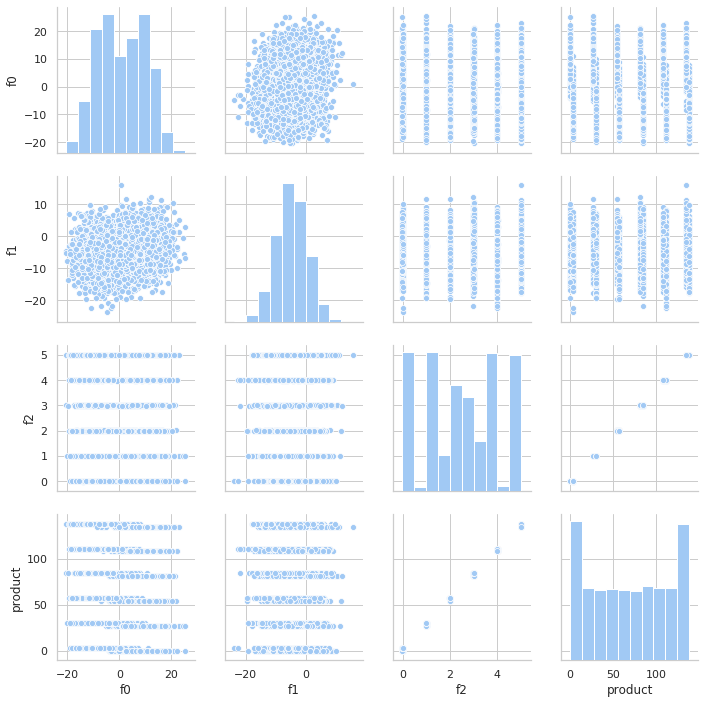

Хитмэп корреляций Пирсона в файле geo_data_1.csv


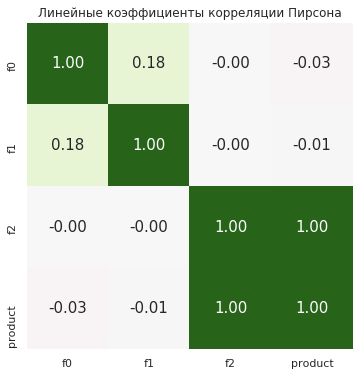

Хитмэп корреляций fi(k) в файле geo_data_1.csv


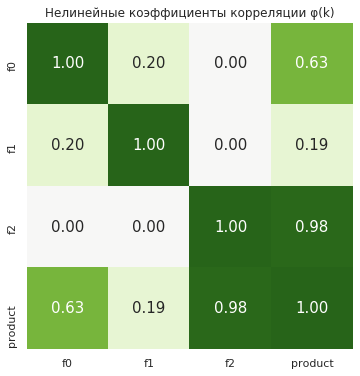

Визуализация выбросов в распределении фичей в файле geo_data_1.csv


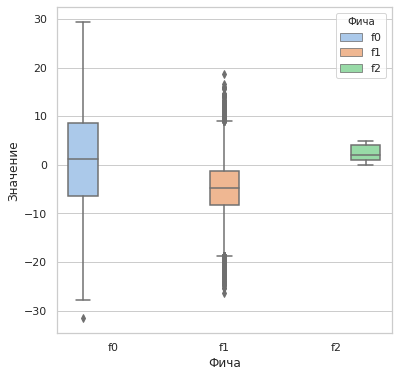

QQ-графики для оценки нормальности фичей в файле geo_data_1.csv


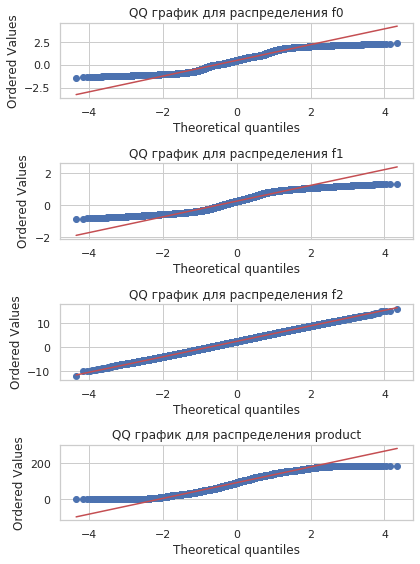

Обучение модели по файлу geo_data_1.csv
RMSE на обучающем сете 0.89
RMSE на тестовом сете 0.89
Ошибки обученной модели по файлу geo_data_1.csv


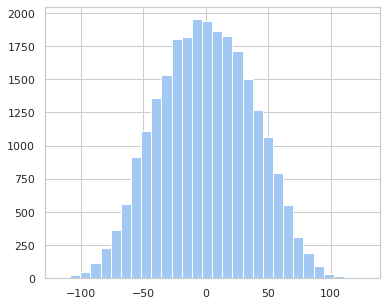

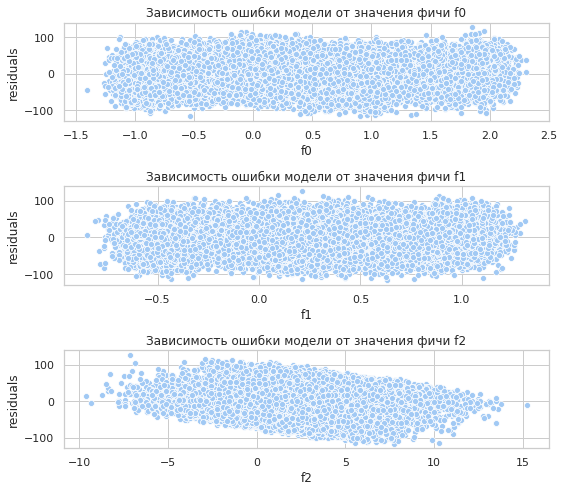

Запускаем бутстрап по файлу geo_data_1.csv


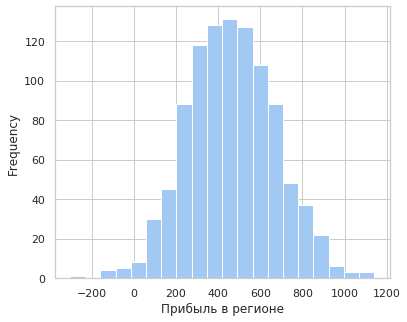

Экономические показатели в регионе geo_data_1.csv
Среднее значение прибыли (млн.руб.): 464.094
2.5%-процентиль прибыли в распределении (млн.руб.): 90.234
97.5%-процентиль прибыли в распределении (млн.руб.): 873.72
Вероятность убытков: 1.00%


In [31]:
d = calculate_region_profit('geo_data_1.csv')
result = result.append(d, ignore_index=True)

И опять код отработал без ошибок, формальных проблем нет, пропусков нет и т.д.

Из интересного - тут продукт является вообще дискретной величиной! Но он настолько хорошо скоррелирован с фичей 2, что все работает "из коробки" с минимальной погрешностью.

Распределения всех величин, кроме фичи 1, совершенно ненормальное, но тут уж ничего не поделаешь.

Ошибки по фиче 2 опять выглядят подозрительно, в нормальном анализе так быть не должно, как я понимаю.

Но результат нас устраивает - вероятность убытков меньше 2,5%.

### Регион 2

Загрузка файла geo_data_2.csv
Загружено с сервера
Дубликатов: 0
Пропусков: 0
Визуализация связей фичей в файле geo_data_2.csv


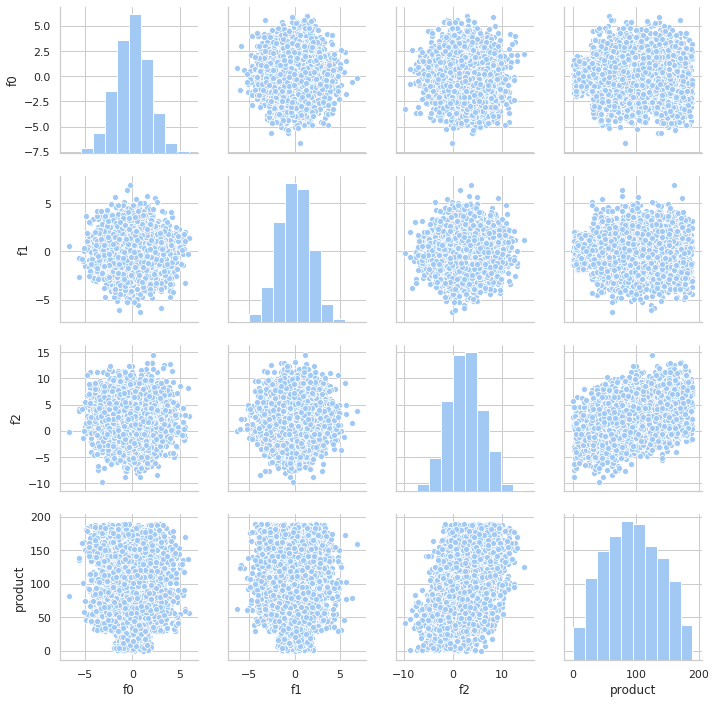

Хитмэп корреляций Пирсона в файле geo_data_2.csv


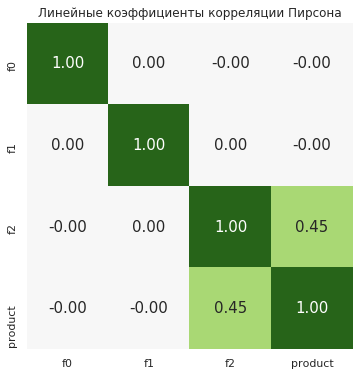

Хитмэп корреляций fi(k) в файле geo_data_2.csv


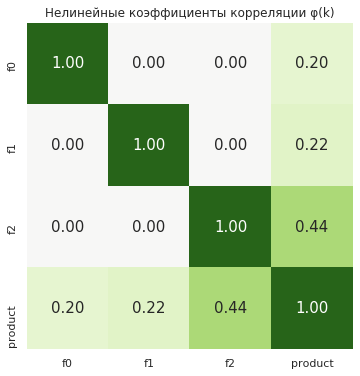

Визуализация выбросов в распределении фичей в файле geo_data_2.csv


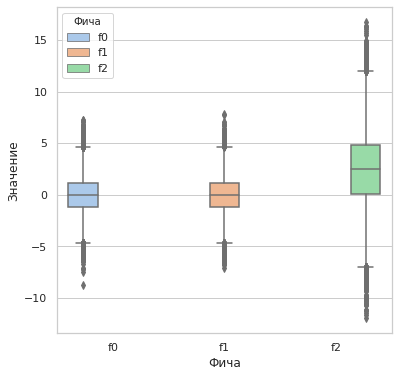

QQ-графики для оценки нормальности фичей в файле geo_data_2.csv


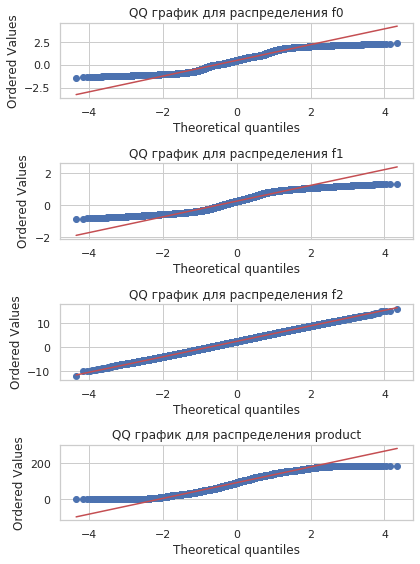

Обучение модели по файлу geo_data_2.csv
RMSE на обучающем сете 40.09
RMSE на тестовом сете 39.95
Ошибки обученной модели по файлу geo_data_2.csv


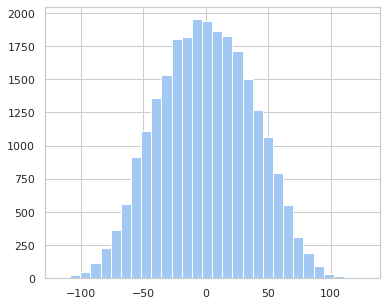

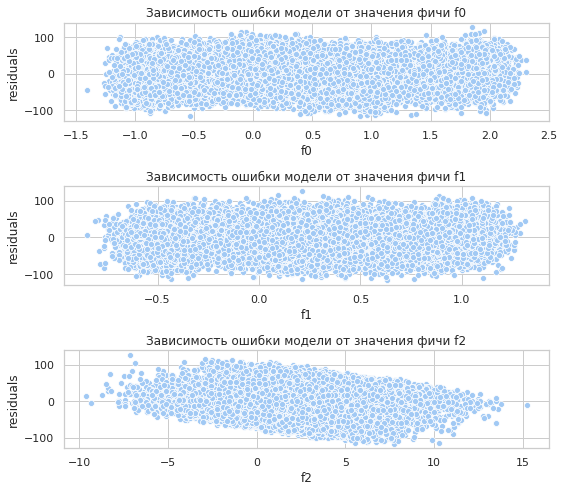

Запускаем бутстрап по файлу geo_data_2.csv


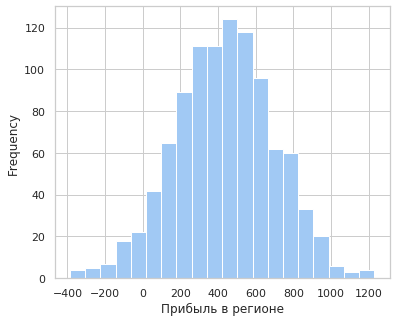

Экономические показатели в регионе geo_data_2.csv
Среднее значение прибыли (млн.руб.): 435.045
2.5%-процентиль прибыли в распределении (млн.руб.): -90.024
97.5%-процентиль прибыли в распределении (млн.руб.): 923.804
Вероятность убытков: 4.80%


In [32]:
d = calculate_region_profit('geo_data_2.csv')
result = result.append(d, ignore_index=True)

- все сработало
- данные явно синтетические
- все фичи имеют нормальное распределение
- остатки выглядят нездоровыми
- регион нам не подходит из-за высокой вероятности убытков

## Выводы

Для начала - сводная табличка с результатами. Указан 95%-доверительный интервал

In [33]:
result

,Регион,Средняя прибыль,Доверительный интервал,Вероятность убытка
0,geo_data_0.csv,399.0,"[-93.0, 878.0]",0.062
1,geo_data_1.csv,464.0,"[90.0, 874.0]",0.010
2,geo_data_2.csv,435.0,"[-90.0, 924.0]",0.048


Основной вывод:
- вероятность убытков при разработке регионов 0 и 2 согласно выбранной стратегии составляет более 2,5%
- средняя чистая прибыль во всех регионах составляет порядка 400 млн.руб. при вложении 10 млрд.руб.
- максимальная средняя чистая прибыль в регионе 1. Она составляет 464 млн.руб. В этом регионе вероятность понести убыток составляет всего 1%
- таким образом, следует разрабатывать регион 1

Дополнительные выводы:
- все первичные данные по регионам явно синтетические, это видно невооруженным взглядом
- в регионах 0 и 2 метрика RMSE линейных моделей составляет около 40, в регионе 1 - всего около 0,89 за счет того, что дисперсия целевой величины почти полностью объясняется единственным признаком
- было бы корректнее использовать бутстрап с большим количеством итераций, т.к. итоговые распределения все-таки не совсем нормальны. Но в ТЗ сказано 1000, поэтому сделал 1000